In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
games.shape

(16719, 16)

# Video Game Sales Data

Welcome! The dataset I will be using here is a subset of video game sales data as of December 22, 2016, scraped from the site vgchartz.com.  The dataset contains general information on the game (name, platform, release year) as well as sales data, in millions, broken up by region (NA, EU, JP, Other, and total or 'Global' column).  A smaller subset of the data contains critic and user review scores from the review aggregator website __[metacritic](http://www.metacritic.com)__.  The full, up to date source data for this dataset can be found __[here](http://www.vgchartz.com/gamedb/)__. 

## Questions
__#1 What is the makeup of this list? Are there specific types of games that are overrepresented in this sample?__ <br>

To start off, I decided to just take a quick look at the dataset with some summary statistics.  Before diving into the fun stuff though, a little bit of data cleanup was needed.  I replaced the 'tbd' text string values in the User_Score column in order to convert the column to a float and ensure that summary statistics could be applied to it.  I also decided to remove both null values as well as values > 2016 from the Year_of_Release column.

In [3]:
games = games.replace('tbd', np.nan)
games['User_Score'] = pd.to_numeric(games['User_Score'])
games = games[games['Year_of_Release'] < 2017.0]
games[games['Year_of_Release'].notnull()]
games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,7983.000000,7463.000000,7463.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,0.536361,68.994363,26.441313,7.126330,163.015141
std,5.877050,0.818416,0.506696,0.311082,0.187994,1.558610,13.920060,19.008136,1.499447,563.863327
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


After cleaning there are 16,446 results, down from 16,719 to start.  As mentioned above, critical scoring only exists for roughly 48% of the total results and slightly lower for User Scoring.  An additional note about the scoring columns.  Metacritic normalizes all their scores into a score out of 100 but they also have a user score section where users can rate and review games.  That rubric (for some reason) is out of 10, which is why the means for User_Score (7.126) and Critic_Score (68.99) seem way off. <br>

Now, let's start diving into the data a bit.

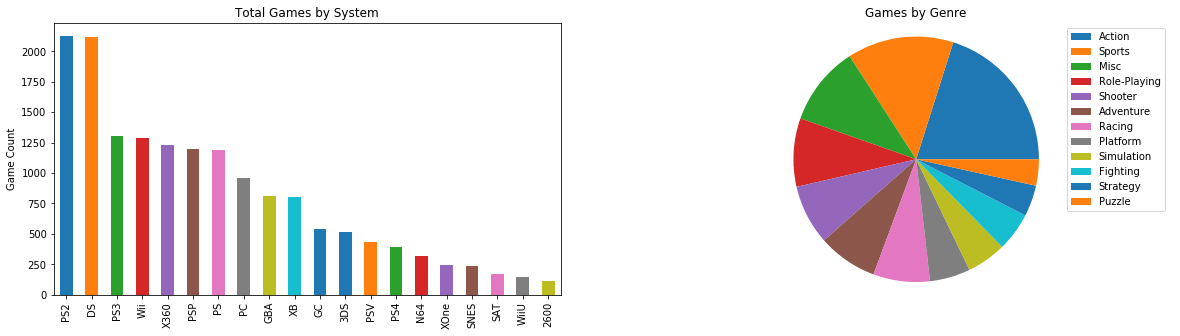

In [4]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
games.Platform.value_counts().head(20).plot(kind='bar')
plt.ylabel('Game Count')
plt.title('Total Games by System')

plt.subplot(1, 2, 2)
genre = games.Genre.value_counts()
plt.pie(genre)
plt.axis('equal')
plt.title('Games by Genre')
plt.legend(genre.index)

plt.show()

Looking at total games per system, two in particular stand out.  The PS2 (Playstation 2) and Nintendo DS both stand above the rest of the dataset in number of games on their systems.  This is more than likely due to the enourmous popularity of the system, which are currently the __[top](https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles)__ two selling consoles of all time.  <br>

Breaking down a count of games by genre also doesn't yield too many surprises.  Action is a fairly open ended genre, so it makes sense that the most games would fall into that bucket rather than something more specific like shooter or racing.  It would be interesting to see a similar breakdown of games within the action genre, as a lot of "Action" games can also be categorized as an "Action-Platformer" or "Action Role-Playing" game.  But alas, that data was not a part of this dataset.

__#2: What are the top selling games? Are there any outliers?__ 

Before we dive fully, let's group by games and look at some summary statistics again, this time just for the sales data.

In [5]:
game_names = games.groupby('Name').aggregate(np.sum).sort_values(
    by=['Global_Sales'], ascending=False)

game_names.describe()[
    ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
    ]

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,11426.000000,11426.000000,11426.000000,11426.000000,11426.000000
mean,0.771799,0.379960,0.210019,0.112956,0.068496
std,2.235619,1.170019,0.760672,0.387690,0.270942
min,0.010000,0.000000,0.000000,0.000000,0.000000
25%,0.060000,0.000000,0.000000,0.000000,0.000000
50%,0.190000,0.070000,0.020000,0.000000,0.010000
75%,0.610000,0.290000,0.130000,0.070000,0.040000
max,82.530000,41.360000,28.960000,10.220000,10.710000


As we with the chart above, global sales has a max value of 82.53 million units but the average for all units is far lower at around 0.771 million units with a standard deviation of ~2.23 million units.  It certainly looks like this 82 million unit game is an outlier, but let's check by looking at the top 25 games by units sold.

Text(0.5,1,'Top 25 Games Sold')

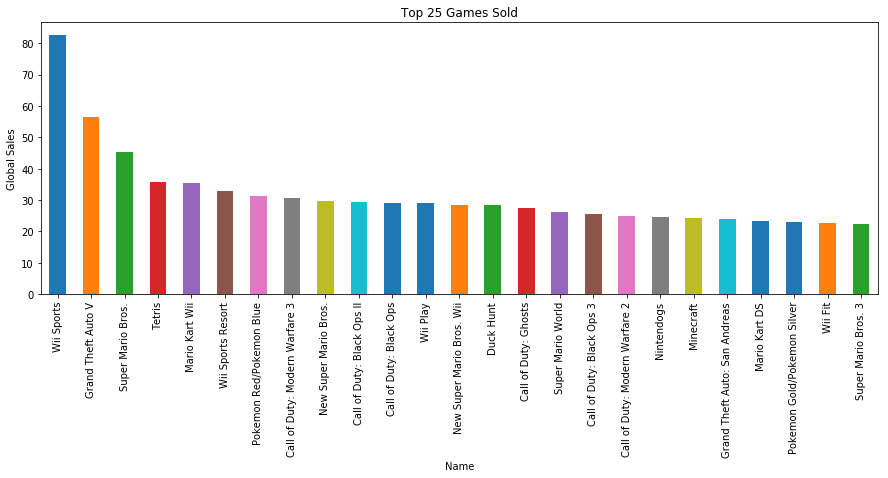

In [6]:
game_names.Global_Sales.head(25)[0:25].plot(kind='bar', figsize=(15, 5))
plt.ylabel('Global Sales')
plt.title('Top 25 Games Sold')

Wii Sports!  The popular minigame collection towers above the rest of the games on this list by ~25 million units.  But why?  Unlike most games on this list, Wii Sports was bundled as a __[pack-in game](https://en.wikipedia.org/wiki/Wii_Sports)__ for the system in all territories expect Japan and South Korea, meaning that most people got the game with the system, instead of buying it.  If I were to try and create a predictive sales model I would want to remove it so it doesn't skew the results. For the purposes of the visualizaion above however, I think it's more interesting to keep it in, as the game was one of the most well known games on the system.

__#3 Is there any relationship between games sales and critic score? What about user score?__ 

While just looking at sales data alone is interesting, it's always more fun to try and figure out what drives those sales numbers. A couple of notes about the data below.  The above sales chart was grouped by game name, meaning it merged different version of the same game into 1 (Grand Theft Auto V, for example, has 5 different versions present in the dataset).  That view made sense when looking at total sales data for games but in this context, where the same game will review differently on different systems, it made sense to split them back out.  I also removed Wii Sports from this set.  With the data ungrouped, Wii Sports stands out as even more of an outlier.  Plus it's nature as a pack-in game in most territories makes it unfair to compare it with games that people had to make a concious decision to buy.<br>

Now, on to the data.

Text(0.5,0,'User Scores')

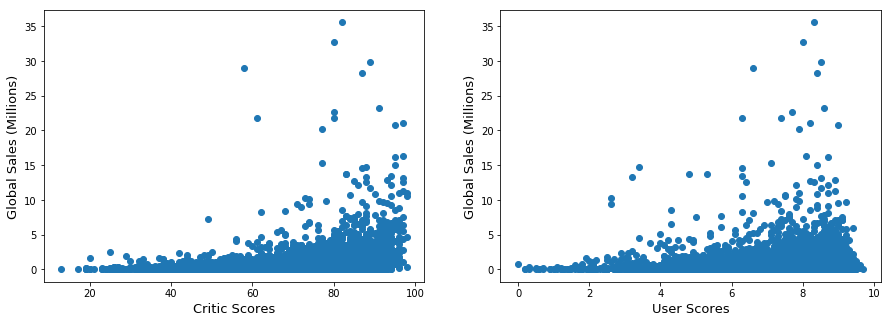

In [7]:
games_no_out = games[(games['Global_Sales'] <= 80.0)]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=games_no_out['Critic_Score'], y=games_no_out['Global_Sales'])
plt.ylabel('Global Sales (Millions)', fontsize=13)
plt.xlabel('Critic Scores', fontsize=13)

plt.subplot(1, 2, 2)
plt.scatter(x=games_no_out['User_Score'], y=games_no_out['Global_Sales'])
plt.ylabel('Global Sales (Millions)', fontsize=13)
plt.xlabel('User Scores', fontsize=13)

Now while this is only a subset of the full data (only ~8k games in this dataset included scores), there does seems to be positive relationship between higher scores and sales.  The skew seems to be slightly less pronounced in the User Scores chart, where there are a number of higher-selling games that have low scores.  User reviews also tend to be less likely to rate games a perfect 10, most likely due to how many more users there are inputting games than there are critics (an average of ~26 critics to ~163 users per game).  Overall, this distribution provides some interesting information, but also leaves us asking different, more specific, questions. 

## Further Research



This dataset is full of interesting data that I did not get a chance to really dive into during this project.  Before that though, in any future project I would want to pull in my own updated data straight from vgchartz.  No sense in working with two year old data when you don't have to! With a fresh dataset in hand, here a two questions I would love to answer in a future project.<br>

__#1 Can we accurately predict what types of games will sell based on the dataset here?__ <br>
Using predictive modeling tools that I'll be working with in future units, I would love to try and build a model that predicts how well different types of will sell.  How much do things like genre and rating really matter?  What about things like developer, publisher, or system? <br>

__#2 Given more data on user and critic score data, more or less pronounced? And do users review games with a different criteria than critics?__ <br>
The dataset here came with incomplete metacritic scoring data.  In a future project, I would want to use a data access method like SQL to pull in and join a more robut metacritic dataset with this one, insuring that the difference in distributions still hold.  After that, I want to look at the reasoning behind the differences, perhaps by looking at common key words shared between user reviews that aren't shared in critic reviews (and vice versa).
